In [4]:
# Dependencies
import pandas as pd

In [7]:
file = 'Dropouts2019-2020_cleaned.csv'

In [8]:
old_df = pd.read_csv(file)
old_df.head()

,County,AUN,LEA,School Code,School,Oct 1 Enrollment Grades 7-12,Male Dropouts,Female Dropouts,Dropouts,Dropout Rate
0,Adams,112011103.0,Bermudian Springs SD,3.0,Bermudian Springs HS,597,2,3,5,0.84%
1,Adams,112011103.0,Bermudian Springs SD,6921.0,Bermudian Springs MS,323,0,0,0,0.00%
2,Adams,112011603.0,Conewago Valley SD,9999.0,Conewago Valley SD,12,1,0,1,8.33%
3,Adams,112011603.0,Conewago Valley SD,6898.0,New Oxford MS,634,0,0,0,0.00%
4,Adams,112011603.0,Conewago Valley SD,17.0,New Oxford SHS,"1,227",13,10,23,1.87%


In [9]:
clean_df = old_df[['County','Dropouts','Dropout Rate']].copy()
clean_df.head(20)
# clean_df.dtypes

,County,Dropouts,Dropout Rate
0,Adams,5,0.84%
1,Adams,0,0.00%
2,Adams,1,8.33%
3,Adams,0,0.00%
4,Adams,23,1.87%
5,Adams,3,0.93%
6,Adams,0,0.00%
7,Adams,0,0.00%
8,Adams,8,0.70%
9,Adams,0,0.00%


In [10]:
clean_df['Dropout Rate'] = clean_df['Dropout Rate'].str.replace('%','')

clean_df.head()

,County,Dropouts,Dropout Rate
0,Adams,5,0.84
1,Adams,0,0.00
2,Adams,1,8.33
3,Adams,0,0.00
4,Adams,23,1.87


In [11]:
clean_df['Dropout Rate'] = clean_df['Dropout Rate'].astype(float)
clean_df
clean_df['Dropouts']=clean_df['Dropouts'].str.replace(',','')
clean_df['Dropouts'] = clean_df['Dropouts'].astype(float)
clean_df

,County,Dropouts,Dropout Rate
0,Adams,5.0,0.84
1,Adams,0.0,0.00
2,Adams,1.0,8.33
3,Adams,0.0,0.00
4,Adams,23.0,1.87
...,...,...,...
1726,York,3.0,15.79
1727,York,8.0,0.80
1728,Overall,11665.0,1.44
1729,"Apr 7, 2021\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t8:5...",NaN,NaN


In [12]:
clean_df = clean_df.dropna(inplace=False)
clean_df

,County,Dropouts,Dropout Rate
0,Adams,5.0,0.84
1,Adams,0.0,0.00
2,Adams,1.0,8.33
3,Adams,0.0,0.00
4,Adams,23.0,1.87
...,...,...,...
1724,York,8.0,0.47
1725,York,0.0,0.00
1726,York,3.0,15.79
1727,York,8.0,0.80


In [13]:
sum_df = clean_df.groupby(['County'])['Dropouts'].sum()
sum_df.head(10)
avg_df = clean_df.groupby(['County'])['Dropout Rate'].mean()
avg_df.head(10)

County
Adams        0.833333
Allegheny    1.304518
Armstrong    3.490769
Beaver       1.258108
Bedford      0.419167
Berks        1.410351
Blair        2.122632
Bradford     0.587778
Bucks        0.916316
Butler       1.725556
Name: Dropout Rate, dtype: float64

In [14]:
new_df = pd.merge(left=sum_df, right=avg_df, how='left', left_on='County', right_on='County')
new_df

,Dropouts,Dropout Rate
County,,
Adams,52.0,0.833333
Allegheny,514.0,1.304518
Armstrong,28.0,3.490769
Beaver,655.0,1.258108
Bedford,21.0,0.419167
...,...,...
Washington,55.0,0.648286
Wayne,20.0,0.418750
Westmoreland,147.0,1.127115


In [22]:
visual_df = new_df.copy()
# visual_df
visual_df.reset_index(inplace = True)
visual_df.head()

,County,Dropouts,Dropout Rate
0,Adams,52.0,0.833333
1,Allegheny,514.0,1.304518
2,Armstrong,28.0,3.490769
3,Beaver,655.0,1.258108
4,Bedford,21.0,0.419167


In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Dropouts')

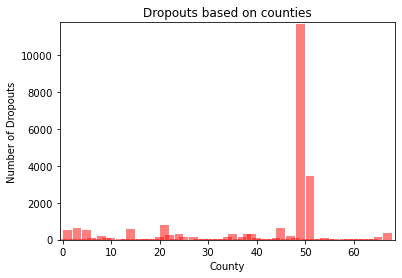

In [59]:
y = visual_df['Dropouts']
x = np.arange(len(visual_df['County']))
plt.bar(x, y, color='r', width=1.8, alpha=0.5)
plt.xlim(-0.5, len(x)+0.5)
plt.ylim(-10, max(y)+100)
plt.title("Dropouts based on counties")
plt.xlabel("County")
plt.ylabel("Number of Dropouts")

In [36]:
# tick_locations = [value for value in x]
# plt.xticks(tick_locations, visual_df['County'])

In [49]:
x = visual_df['County']
y = visual_df['Dropouts']

Text(0, 0.5, 'Number of Dropouts')

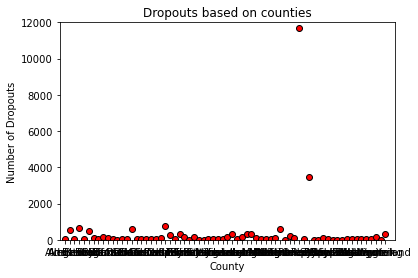

In [57]:
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")
plt.ylim(-1,12000)
plt.xlim(-1,69)
plt.title("Dropouts based on counties")
plt.xlabel("County")
plt.ylabel("Number of Dropouts")